In [1]:
import sys

sys.path.append("../../code")

In [2]:
from tqdm.notebook import tqdm
import math
import numpy as np
import pandas as pd
import seaborn as sns

from agents.Buyer.constants import CURIOSITY as epsilon_buyer
from agents.Seller.constants import CURIOSITY as epsilon_seller
from src.constants import NB_SELLERS
from src.simulate import get_new_agents, play_round
from display.__init__ import plot_avg_q_table, plot_avg_sub_q_tables, plot_prices, plot_epsilon

In [3]:
Verbose = False
NB_ROUNDS = 100000

sellers, buyers = get_new_agents(Verbose=Verbose)

for i in tqdm(range(NB_ROUNDS)):
    if Verbose:
        print(f"Round {i+1}\n------{'-'*len(str(i+1))}\n")
    sellers, buyers = play_round(sellers, buyers, Verbose=Verbose)
    if Verbose:
        print("============\n")

  0%|          | 0/100000 [00:00<?, ?it/s]

../../code\agents\Buyer\Buyer.py:135: RuntimeWarning: divide by zero encountered in longlong_scalars
  qty_lim = min(qty_left, self.budget_left // price)


# Seller

In [4]:
seller = sellers[0]

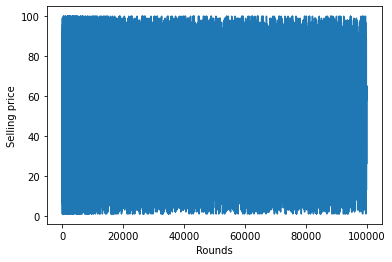

In [5]:
seller.plot_price()

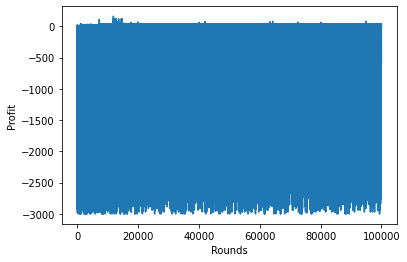

In [6]:
seller.plot_profit()

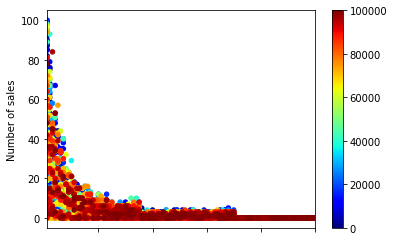

In [7]:
seller.plot_history()

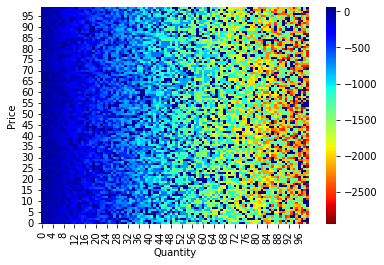

In [8]:
seller.plot_q_table()

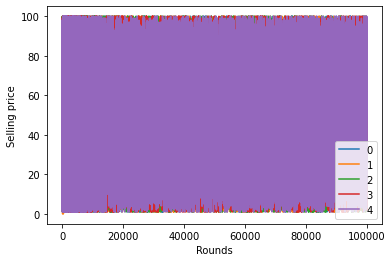

In [9]:
plot_prices(sellers)

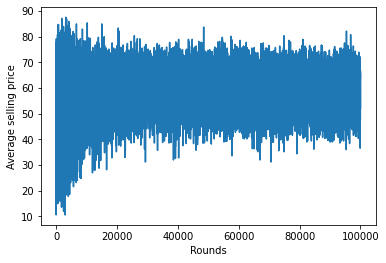

In [10]:
plot_prices(sellers, avg=True)

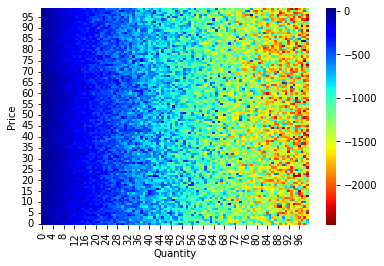

In [11]:
plot_avg_q_table(sellers)

In [12]:
seller.get_size_unk()

9801

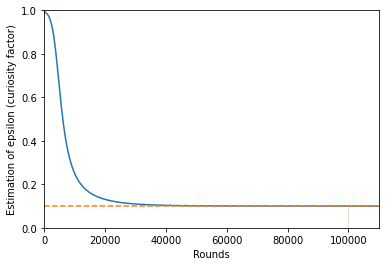

In [13]:
plot_epsilon(0.1, seller.get_size_unk(), NB_ROUNDS)

# Buyer

In [14]:
buyer = buyers[0]

In [15]:
# buyer.plot_history()

In [16]:
# buyer.plot_sub_q_tables()

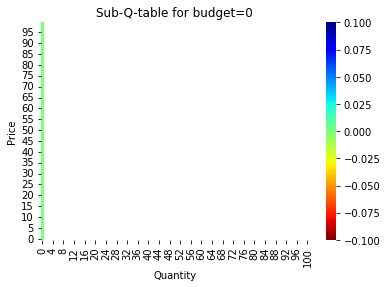

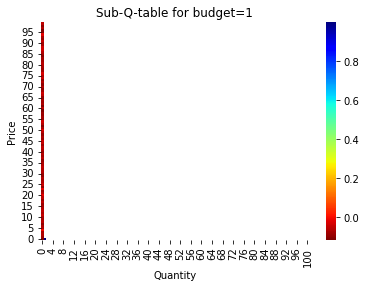

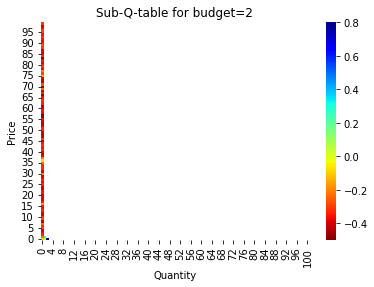

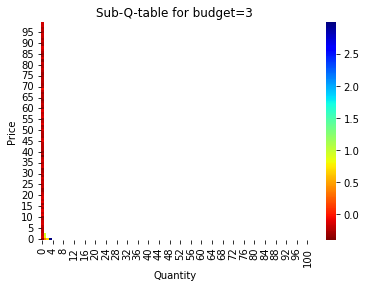

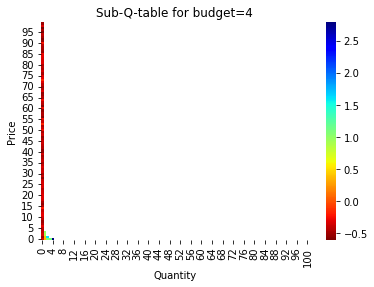

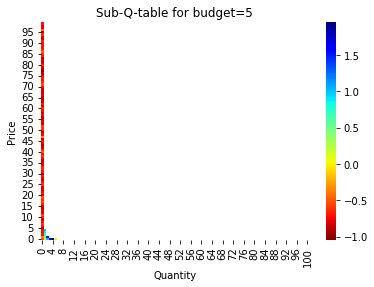

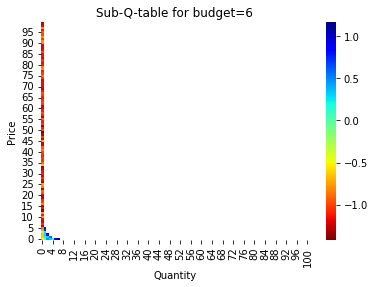

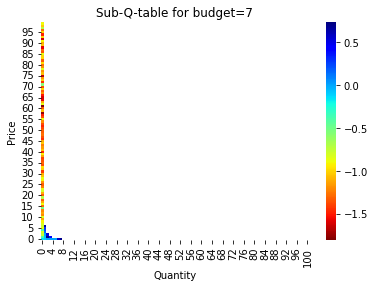

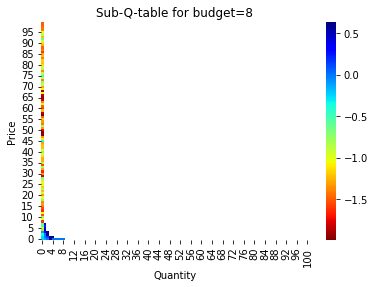

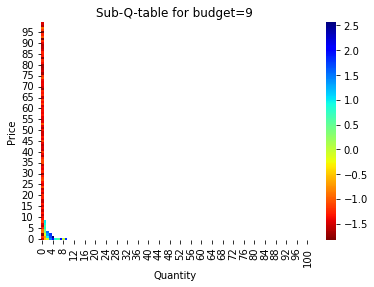

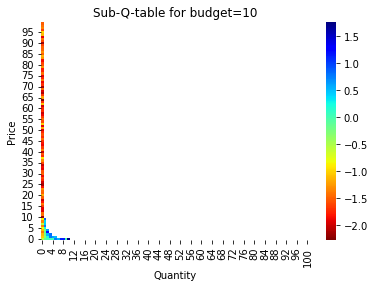

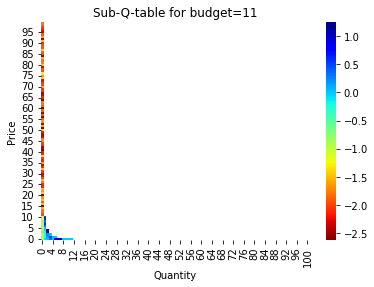

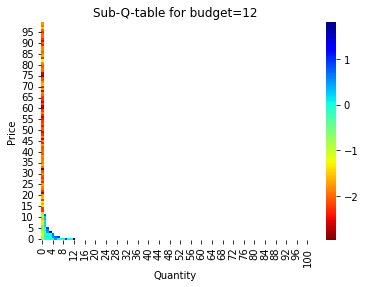

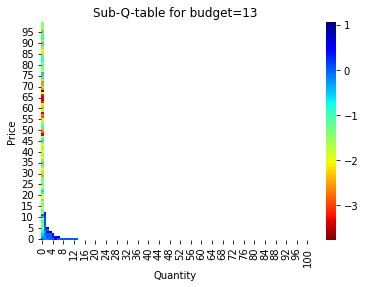

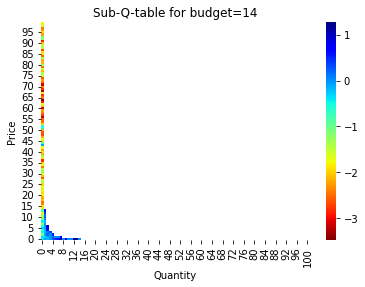

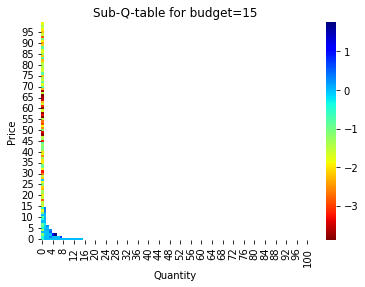

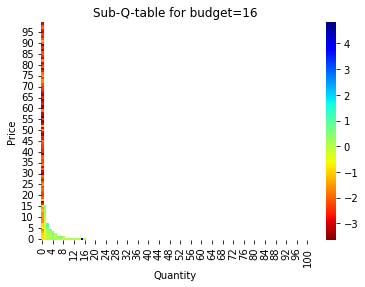

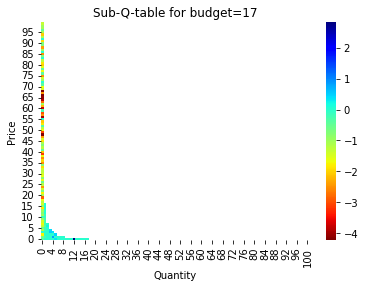

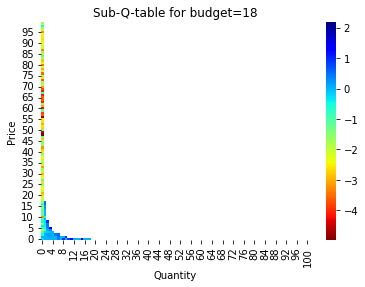

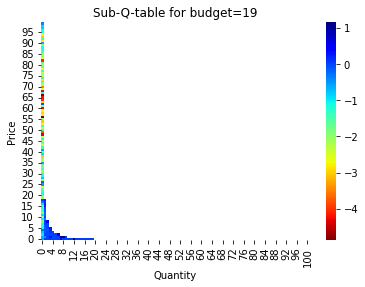

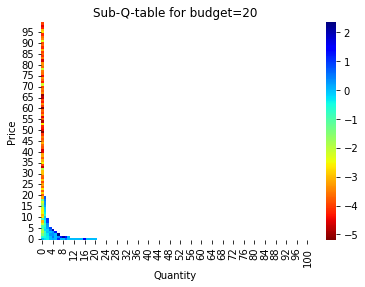

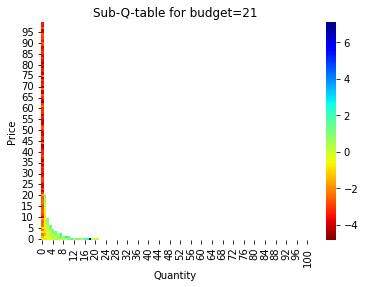

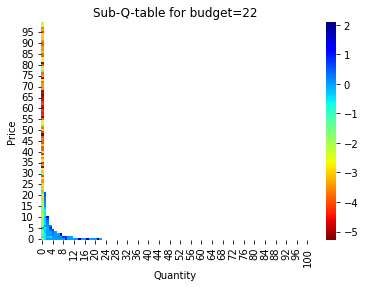

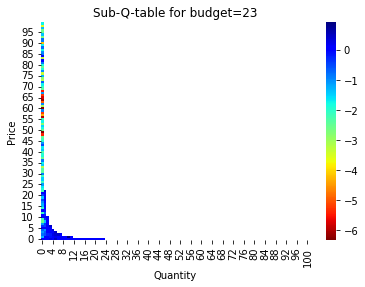

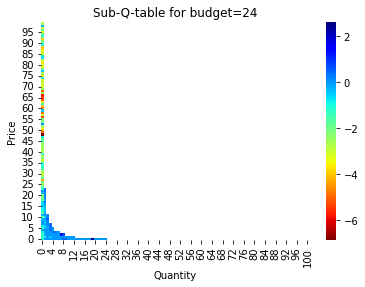

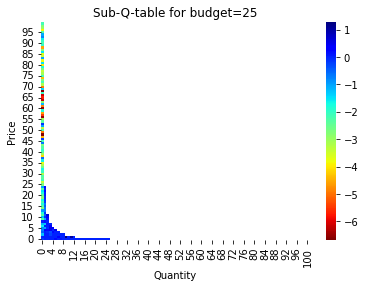

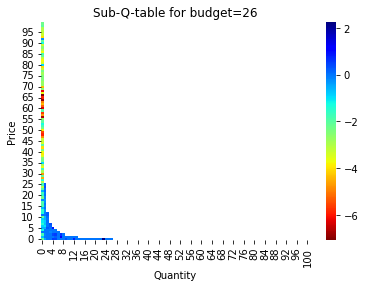

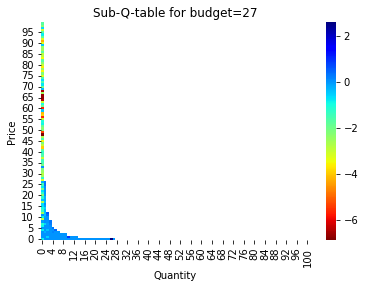

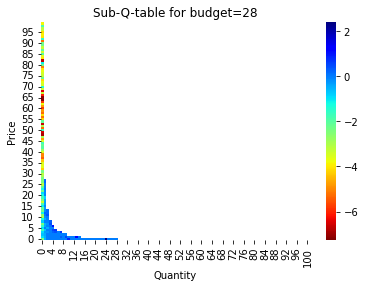

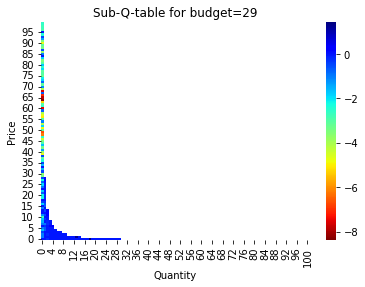

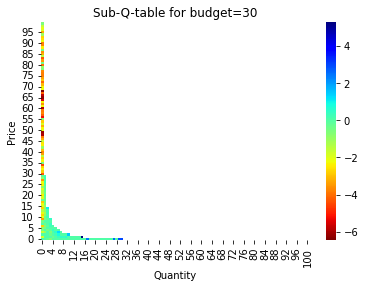

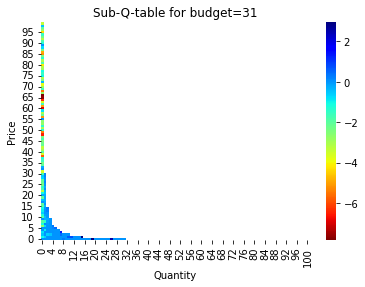

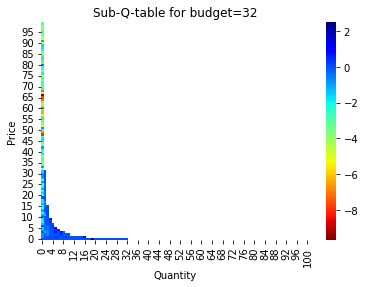

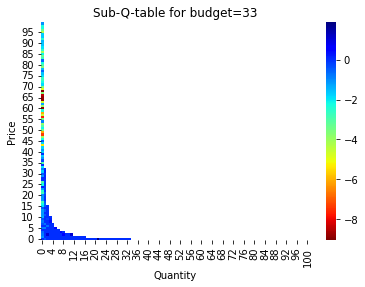

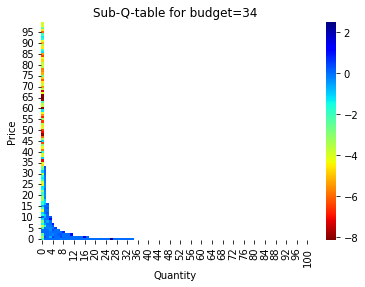

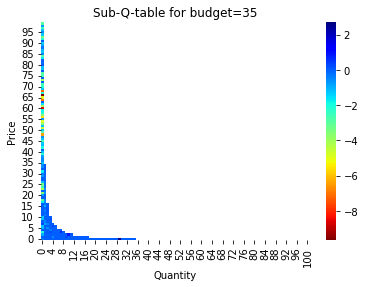

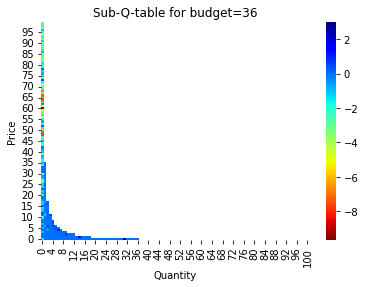

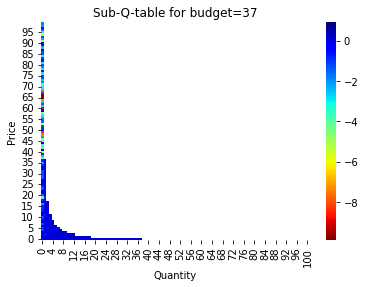

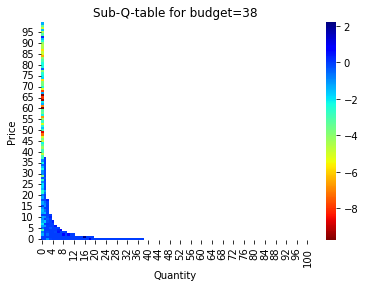

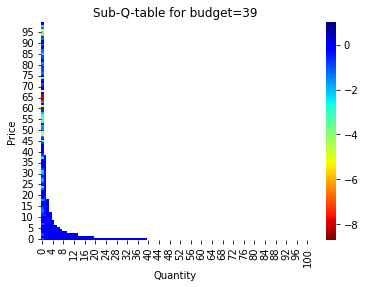

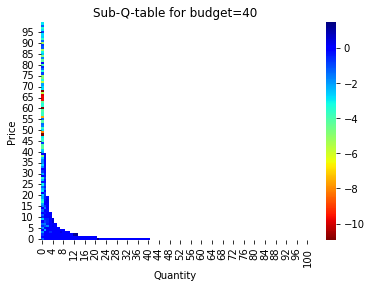

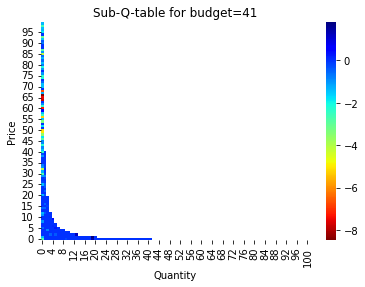

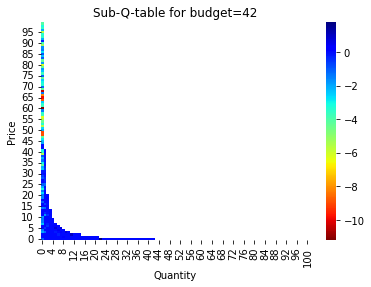

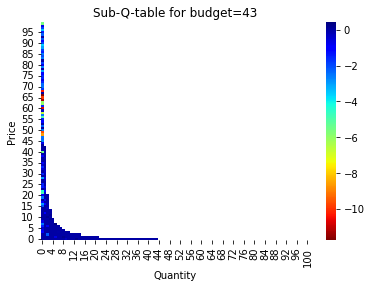

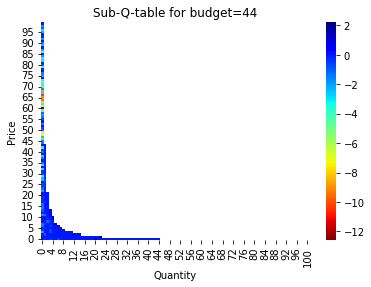

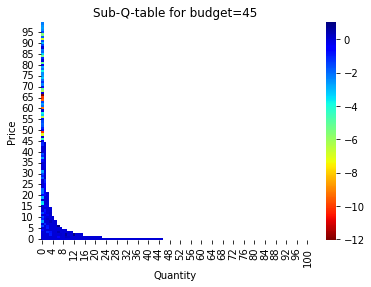

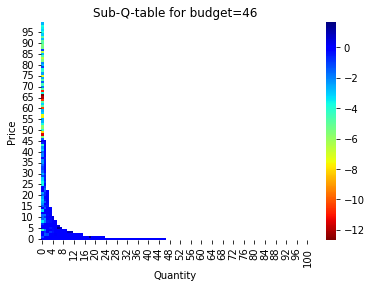

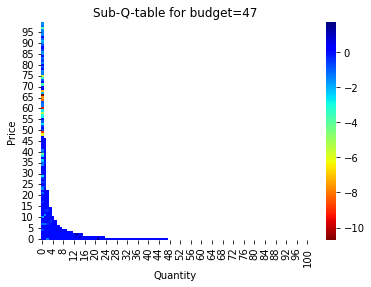

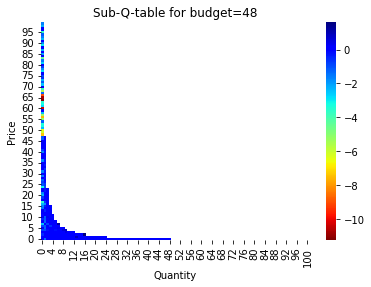

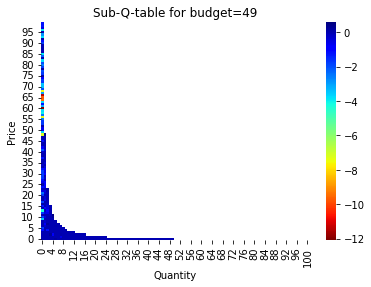

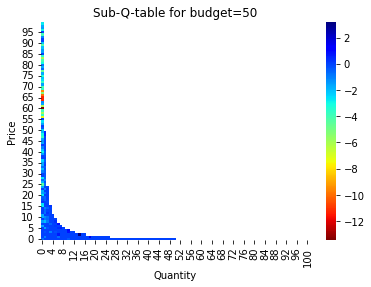

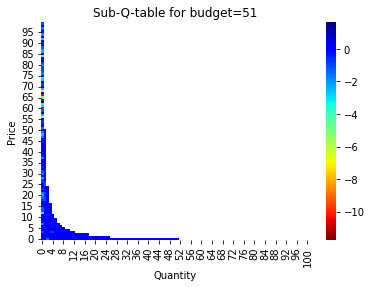

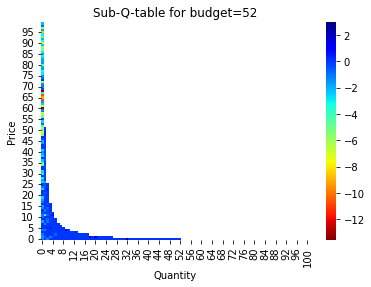

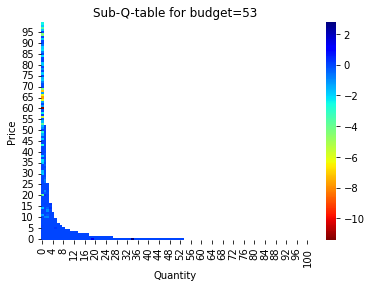

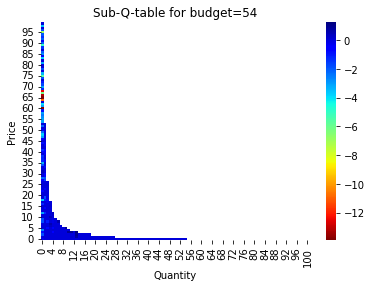

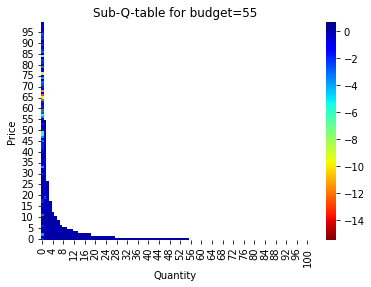

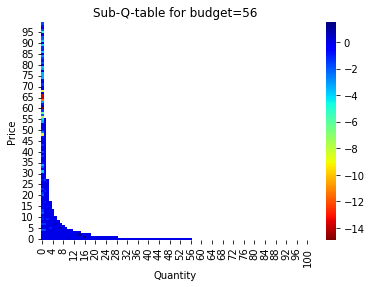

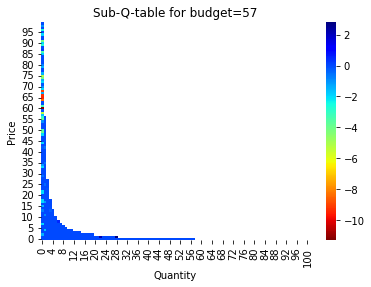

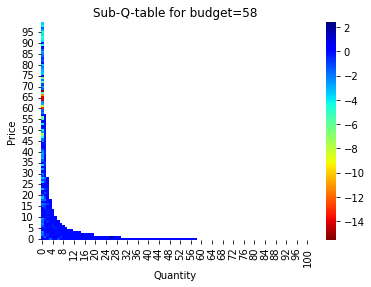

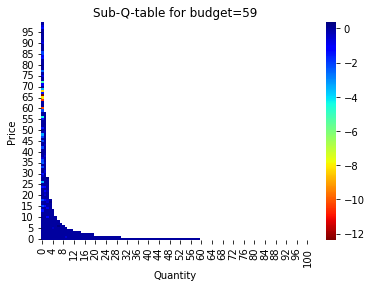

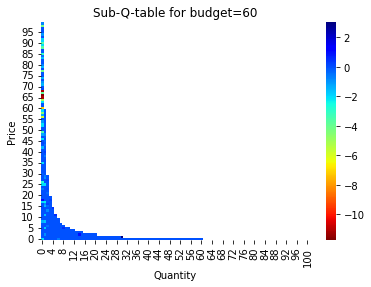

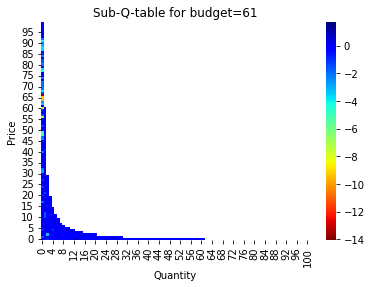

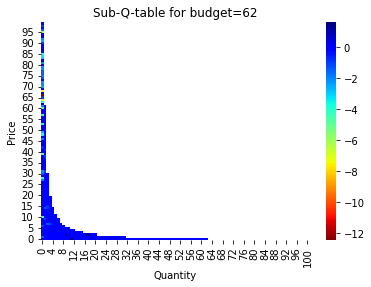

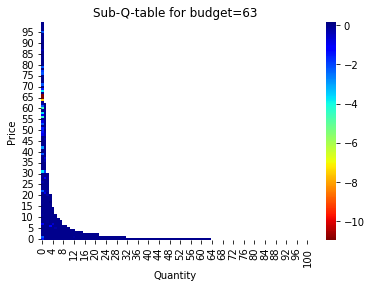

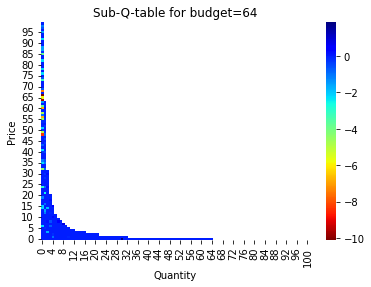

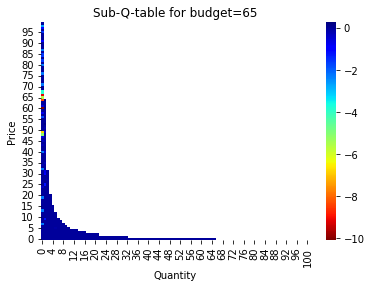

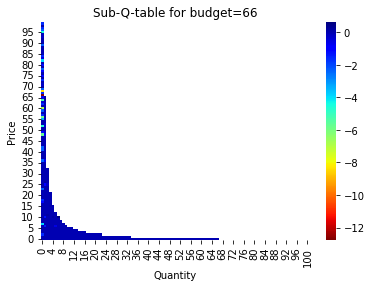

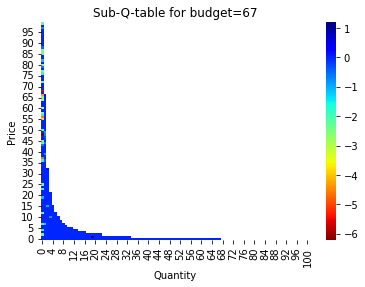

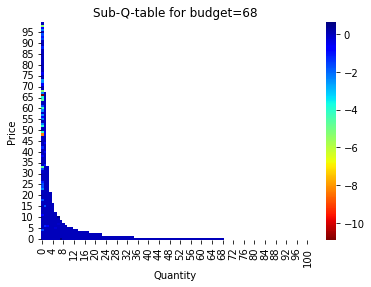

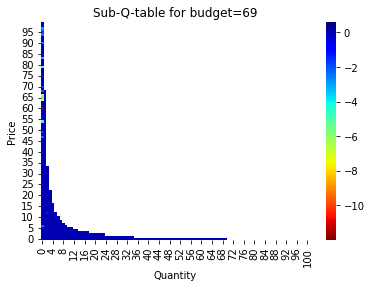

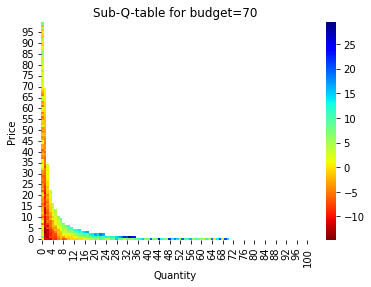

In [17]:
plot_avg_sub_q_tables(buyers)

In [18]:
buyer.get_size_unk()

31903

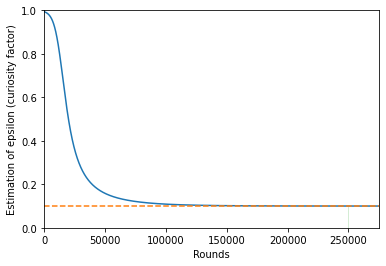

In [19]:
plot_epsilon(epsilon_buyer, buyer.get_size_unk(), math.floor(NB_ROUNDS * NB_SELLERS/2))

In [20]:
q_table = buyer.get_q_table()
q_table

array([[[ 0.00000000e+00,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 0.00000000e+00,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 0.00000000e+00,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ 0.00000000e+00,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 0.00000000e+00,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 0.00000000e+00,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[-1.28798828e-01,  9.99511719e-01,             nan, ...,
                     nan,             nan,             nan],
        [ 8.76048571e-03,             nan,             nan, ...,
                     nan,             

C:\Users\Flo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

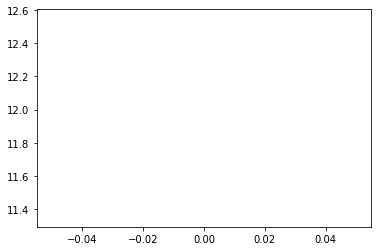

In [21]:
budget = buyer.budget
sns.lineplot(range(101), np.max(q_table[budget], axis=0))

In [22]:
np.max(q_table[budget], axis=0)

array([11.9482823,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        